In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("china_gdp.csv")
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


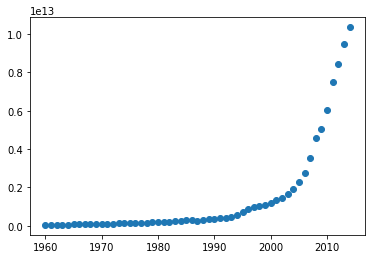

In [3]:
plt.scatter(df.Year, df.Value)
plt.show()

In [4]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

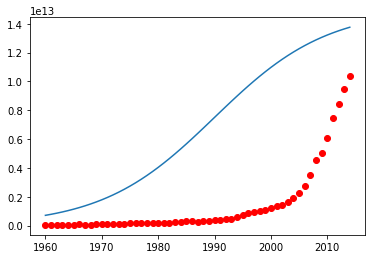

In [5]:
beta_1 = 0.10
beta_2 = 1990.0

x_data = df['Year'].values
y_data = df['Value'].values

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')
plt.show()

In [6]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [7]:
from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451710, beta_2 = 0.997207


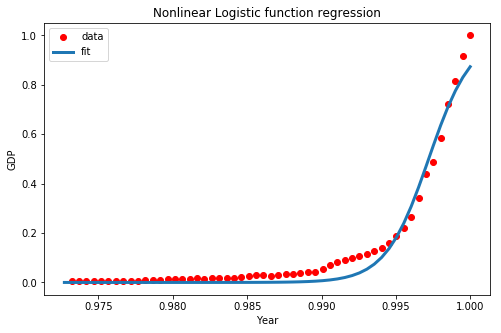

In [8]:
x = np.linspace(1960, 2015, 56)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.title('Nonlinear Logistic function regression')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [9]:
def log_func(x, Beta_1, Beta_2):
     y = Beta_1 * np.log(Beta_2*x)
     return y

 beta_1 = 21.614681, beta_2 = 1.020150


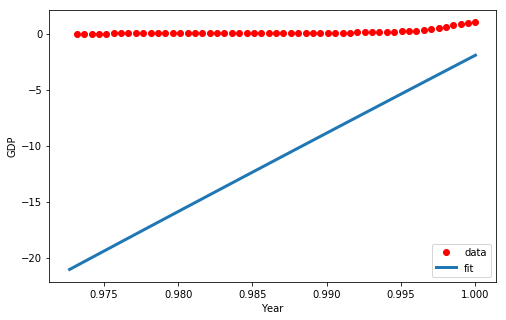

In [10]:
popt1, pcov1 = curve_fit(log_func, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt1[0], popt1[1]))

x = np.linspace(1960, 2015, 56)
x = x/max(x)
plt.figure(figsize=(8,5))
y = log_func(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [31]:
df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree = 5)
regr = LinearRegression()

Xtrain = df[['Year']]
Ytrain = df[['Value']]

xdata_poly = poly.fit_transform(Xtrain)
regr.fit(xdata_poly, Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
regr.coef_

array([[ 0.00000000e+00,  1.20747199e+03,  2.72901646e+05,
         2.71121914e+08, -2.05442418e+05,  4.15122602e+01]])

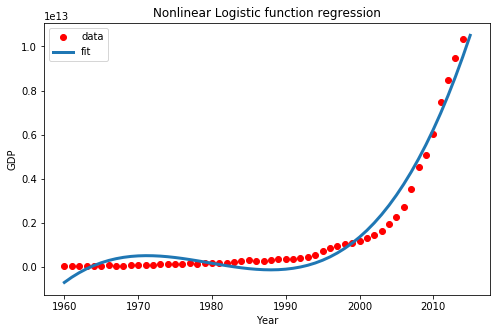

In [42]:
x = np.linspace(1960, 2015, 56)
plt.figure(figsize=(8,5))
plt.plot(Xtrain, Ytrain, 'ro', label='data')
plt.plot(x, regr.intercept_ + regr.coef_[0][1] * x + regr.coef_[0][2] * np.power(x,2)
                            + regr.coef_[0][3] * np.power(x,3)
                            + regr.coef_[0][4] * np.power(x,4)
                            + regr.coef_[0][5] * np.power(x,5), linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.title('Nonlinear Logistic function regression')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()